# Return számolás

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import statsmodels.api as sm

In [3]:
px_last=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="px_last 2016", index_col=0)
dividend=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="div 2016", index_col=0)
rfree=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="rf 2016", index_col=0)

In [16]:
px_last.replace(0, np.nan, inplace=True)

In [17]:
#napi rf, es ne %-ban legyen, hanem tizedes tortben
rf=(rfree/100)/365

In [18]:
r = px_last+dividend
eredmeny=(r/px_last.shift(1))

In [19]:
#loghozam szamolas
hozam = eredmeny.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)

In [20]:
#effektiv hozam
effhozam=eredmeny-1
effhozam=effhozam-rf
effhozam =effhozam.drop(effhozam.index[0])
effhozam.replace([np.inf, -np.inf], 0, inplace=True)
effhozam=effhozam.fillna(0)
effr_i=effhozam.iloc[1761:2012]

In [21]:
#excess return
hozam=hozam-rf

In [22]:
#NaN sor eltávolítása
hozam = hozam.drop(hozam.index[0])

In [23]:
hozam.replace([np.inf, -np.inf], 0, inplace=True)
hozam=hozam.fillna(0)

In [24]:
r_i=hozam.iloc[1761:2012]

In [25]:
#kummulált effektív hozam
eff_kummhozam=effr_i.sum()

<Axes: ylabel='Frequency'>

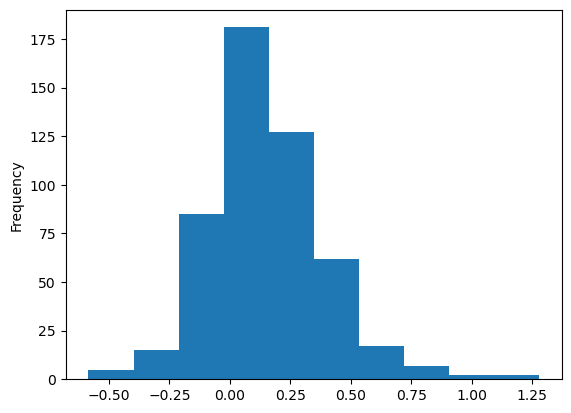

In [26]:
eff_kummhozam.plot.hist()

In [27]:
divergencia=effr_i-r_i
divergencia.round(4)

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0000,0.0000,0.0007,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,...,0.0007,0.0000,0.0003,0.0005,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
2023-01-04,0.0001,0.0021,0.0001,0.0000,0.0010,0.0001,0.0000,0.0000,0.0001,0.0002,...,0.0018,0.0000,0.0000,0.0005,0.0000,0.0001,0.0000,0.0001,0.0007,0.0001
2023-01-05,0.0000,0.0004,0.0001,0.0000,0.0001,0.0000,0.0000,0.0003,0.0007,0.0007,...,0.0000,0.0002,0.0002,0.0002,0.0004,0.0000,0.0002,0.0001,0.0002,0.0003
2023-01-06,0.0004,0.0001,0.0007,0.0002,0.0000,0.0001,0.0001,0.0003,0.0001,0.0007,...,0.0003,0.0004,0.0001,0.0001,0.0006,0.0002,0.0000,0.0013,0.0007,0.0001
2023-01-09,0.0000,0.0005,0.0000,0.0004,0.0000,0.0000,0.0002,0.0001,0.0004,0.0000,...,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0000,0.0001,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0002,0.0000
2023-12-27,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-12-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0001,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# GICS classification

### GICS map beolvasása

In [ ]:
gics = pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\gics-map-2024.xlsx")
gics[gics["SubIndustry"] == "Food Retail"]

### Wikipédia beolvasása

In [ ]:
# Import Packages
import bs4 as bs
import requests 
import pandas as pd
import re

wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

def get_sp500_tickers():
  resp = requests.get(wiki_url)
  soup = bs.BeautifulSoup(resp.text, "lxml")
  table = soup.find('table', {'id': 'constituents'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    #print(row.find_all('a'))
    
    ticker = [t.text.strip() for t in row.find_all('td')]
    for link in row.findAll('a'):
        ticker.append(link.get('href'))
    tickers.append(ticker)
   
  return tickers


data = get_sp500_tickers()

# Keep only 14 columns
data = [row[0:13] for row in data]

# Create Pandas dataframe
columns = ["Ticker", "CompanyName", "Sector", "SubIndustry", "Reports", "HQLocation", "DateFirstAdded", "CIK", "FoundedYear", "QuoteURL", "WikiPage", "EDGARURL", "HQLocationWikiPage"]
df = pd.DataFrame(data=data, columns=columns)


### GICS map és Wikipédia összefűzése

In [ ]:
# Add gics code column
gics_df = pd.DataFrame()
for i in range(0, len(df)):
    gics_row = gics[gics["SubIndustry"] == df.loc[i,"SubIndustry"]]
    #if len(gics_row) != 1:
     #   print(f"**** Error in index {i}\n\n", df.loc[i])
    gics_df = pd.concat([gics_df, gics_row], ignore_index=True)


for col in gics_df.columns:
    columns.append(col)
    
#columns

sp500_df=pd.concat([df, gics_df], axis=1)
sp500_df=sp500_df.drop("Reports", axis=1)
sp500_df=sp500_df.drop("HQLocation", axis=1)
sp500_df=sp500_df.drop("DateFirstAdded", axis=1)
sp500_df=sp500_df.drop("CIK", axis=1)
sp500_df=sp500_df.drop("FoundedYear", axis=1)
sp500_df=sp500_df.drop("QuoteURL", axis=1)
sp500_df=sp500_df.drop("WikiPage", axis=1)
sp500_df=sp500_df.drop("EDGARURL", axis=1)
sp500_df=sp500_df.drop("HQLocationWikiPage", axis=1)
sp500_df=sp500_df.drop("Unnamed: 9", axis=1)
sp500_df=sp500_df.drop("SubIndustryDescription", axis=1)


sp500_df

#sp500_df.to_csv('sp500gics.csv', index = True) 
#sp500_df.to_excel('sp500gicsexcel.xlsx', index = True) 

### 0-1 mátrix

In [28]:
#lementettem az adatletoltessel egyidoben, hogyha valtozik a wikipedian az sp500 osszetetel, akkor ne legyen belole problema
matrix=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\sp500gicsexcel.xlsx", sheet_name="Sheet1", index_col=0)

In [29]:
matrix = pd.crosstab(index=matrix['Ticker'], columns=matrix['SectorId'])
matrix

SectorId,10,15,20,25,30,35,40,45,50,55,60
Ticker,,,,,,,,,,,
A,0,0,0,0,0,1,0,0,0,0,0
AAL,0,0,1,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,1,0,0,0
ABBV,0,0,0,0,0,1,0,0,0,0,0
ABNB,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
YUM,0,0,0,1,0,0,0,0,0,0,0
ZBH,0,0,0,0,0,1,0,0,0,0,0
ZBRA,0,0,0,0,0,0,0,1,0,0,0


In [30]:
#hany db ceg tartozik egy-egy sectorba
elo=matrix.sum()
elo

SectorId
10    23
15    28
20    78
25    53
30    38
35    64
40    72
45    64
50    22
55    30
60    31
dtype: int64

# FAKTOROK KISZÁMOLÁSA

### Momentum

In [32]:
hozam=effhozam

In [33]:
hozam_=1+hozam

In [34]:
logar=hozam_.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)

In [35]:
logar=logar.fillna(0)

In [36]:
start_index = logar.index.get_loc('2023-01-03')
end_index = len(logar)

momentum = pd.DataFrame(index=logar.index[start_index:end_index], columns=logar.columns)

for i in range(start_index, end_index):
    sum_values = logar.iloc[i-270:i-9, :].sum()  
    momentum.iloc[i-start_index, :] = sum_values

In [45]:
normalmom=pd.DataFrame(index= momentum.index, columns=momentum.columns)
for index, row in momentum.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normalmom.loc[index] = normalized_row

In [46]:
momentum=normalmom

In [47]:
momentum = momentum.astype(float)
momentum.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [48]:
#NaN ellenőrzése
x=0
for column in momentum.columns:
    has_nan = momentum[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [49]:
#Inf ellenőrzése
szumma=0
for column in momentum.columns:
    has_inf = np.isinf(momentum[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [40]:
#utolso sorbol eloszlas kirajzolasa
momentum_=momentum.iloc[-1]

<Axes: ylabel='Frequency'>

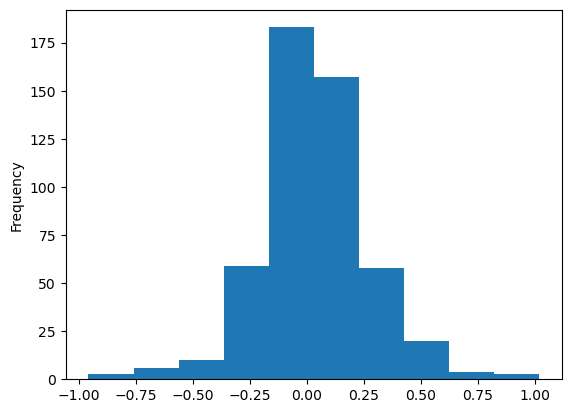

In [41]:
momentum_.plot.hist()

In [43]:
oszlopok = momentum.iloc[:, [2, 31, 98, 322, 501 ]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)

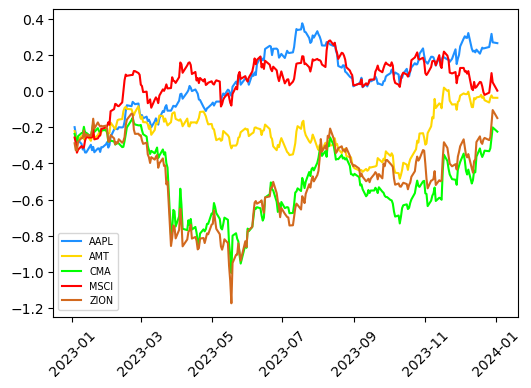

In [44]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue',  'gold','lime', 'red', 'chocolate' ]

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(0, 0.15), fancybox=True, fontsize='x-small',)
plt.xticks(rotation=45) 
plt.show()

### Dividend Yield

In [50]:
eves_div=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="éves div", index_col=0)

In [51]:
df = eves_div.replace(0, method='ffill')
px_last_rovid=px_last.iloc[1762:2013]

In [60]:
DivYield_=df/px_last_rovid
DivYield_=DivYield_.fillna(0)
DivYield_.replace([np.inf, -np.inf], 0, inplace=True)

In [61]:
DivYield=DivYield_

In [62]:
normaldiv=pd.DataFrame(index= DivYield.index, columns=DivYield.columns)
for index, row in DivYield.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normaldiv.loc[index] = normalized_row

In [63]:
DivYield=normaldiv

In [64]:
DivYield=DivYield.astype(float)
DivYield.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [65]:
#NaN ellenorzese
x=0
for column in DivYield.columns:
    has_nan = DivYield[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [66]:
#Inf ellenőrzése
szumma=0
for column in DivYield.columns:
    has_inf = np.isinf(DivYield[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [57]:
DivYield_=DivYield.iloc[-1]

<Axes: ylabel='Frequency'>

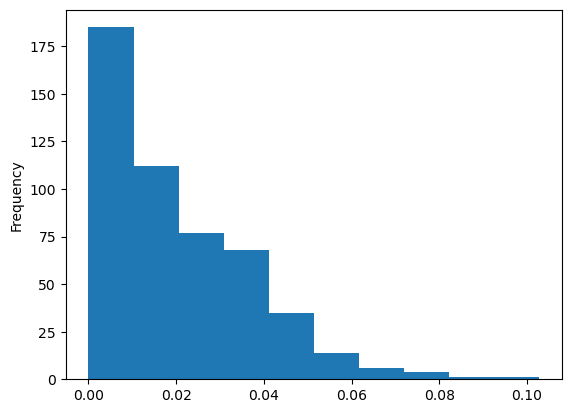

In [58]:
DivYield_.plot.hist()

### Value

In [67]:
price_to_book=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to book", index_col=0)
price_to_CF=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to cf", index_col=0)
P_per_E_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="p per e rata", index_col=0)
EBITDA_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="EBITDA", index_col=0)
SALES_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SALES", index_col=0)
For_PE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="forcasted p per e", index_col=0)
Market_cap=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Market cap", index_col=0)
LT_Debt_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="LT DEBT", index_col=0)
ST_Debt_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="ST DEBT", index_col=0)
cash_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="cash", index_col=0)
total_asset_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Total Asset", index_col=0)

In [68]:
For_PE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="forcasted p per e", index_col=0)
P_per_E_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="p per e rata", index_col=0)

In [70]:
book_to_price=1/price_to_book
book_to_price.replace([np.inf, -np.inf], 0, inplace=True)
book_to_price=book_to_price.fillna(0)

In [71]:
CF_to_price=1/price_to_CF
CF_to_price.replace([np.inf, -np.inf], 0, inplace=True)
CF_to_price=CF_to_price.fillna(0)

In [72]:
#P/E extrapolalas atlaggal
start_index = P_per_E_.index.get_loc('2023-01-03')
end_index = len(P_per_E_)
forp_e_2y = pd.DataFrame(index=P_per_E_.index[start_index:end_index], columns=P_per_E_.columns)

for column_name in P_per_E_.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = P_per_E_.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=For_PE.iloc[i-start_index][column_name]
        tarol.append(y)
        atlag3=sum(tarol)/len(tarol)
        forp_e_2y.iloc[i - start_index][column_name] = atlag3

In [73]:
P_per_E=P_per_E_.iloc[1762:2013]
E_per_P=1/P_per_E
E_per_P.replace([np.inf, -np.inf], 0, inplace=True)
E_per_P=E_per_P.fillna(0)

In [74]:
EBITDA_ism = EBITDA_.replace(0, method='ffill')
SALES_ism = SALES_.replace(0, method='ffill')
LT_Debt_ism = LT_Debt_.replace(0, method='ffill')
ST_Debt_ism = ST_Debt_.replace(0, method='ffill')
cash_ism = cash_.replace(0, method='ffill')
total_asset_ism = total_asset_.replace(0, method='ffill')

In [75]:
EBITDA= EBITDA_ism.iloc[1762:2013]
SALES= SALES_ism.iloc[1762:2013]
LT_Debt= LT_Debt_ism.iloc[1762:2013]
ST_Debt= ST_Debt_ism.iloc[1762:2013]
cash= cash_ism.iloc[1762:2013]
total_asset= total_asset_ism .iloc[1762:2013]

In [76]:
nulla=ST_Debt*0
EV=Market_cap+LT_Debt+np.maximum(ST_Debt-cash, nulla)
Ebitda_per_ev=EBITDA/EV
Ebitda_per_ev.replace([np.inf, -np.inf], 0, inplace=True)
Ebitda_per_ev=Ebitda_per_ev.fillna(0)

In [77]:
forep_2y = pd.DataFrame(index=P_per_E.index[start_index:end_index], columns=P_per_E.columns)
for col in forp_e_2y.columns:
    forep_2y[col] = forp_e_2y[col].apply(lambda x: 1 / x if x != 0 else 0)

In [78]:
For_EP=0.5*(1/For_PE)+0.5*forep_2y
For_EP.replace([np.inf, -np.inf], 0, inplace=True)
For_EP=For_EP.fillna(0)

In [79]:
SalesEV=SALES/EV
SalesEV.replace([np.inf, -np.inf], 0, inplace=True)
SalesEV=SalesEV.fillna(0)

In [80]:
Value=0.13*book_to_price+0.18*CF_to_price+0.18*E_per_P+0.21*Ebitda_per_ev+0.16*For_EP+0.13*SalesEV

In [90]:
normalval=pd.DataFrame(index= Value.index, columns=Value.columns)
for index, row in Value.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / np.sqrt(row_std)
    
    
    normalval.loc[index] = normalized_row

In [91]:
Value=normalval
Value=Value.astype(float)

In [92]:
#NaN ellenorzese
x=0
for column in Value.columns:
    has_nan = Value[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [93]:
#inf ellenorzese
szumma=0
for column in Value.columns:
    has_inf = np.isinf(Value[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [82]:
Value_=Value.iloc[250]

<Axes: ylabel='Frequency'>

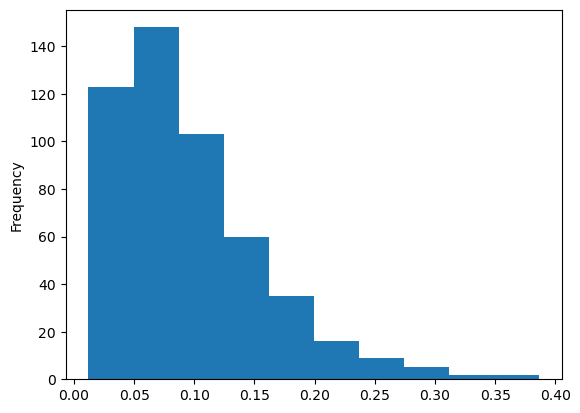

In [83]:
Value_.plot.hist()

In [88]:
oszlopok = Value.iloc[:, [2, 435, 323, 501, 90, 264]]
transposed_data = oszlopok.T
transposed_df = pd.DataFrame(transposed_data)

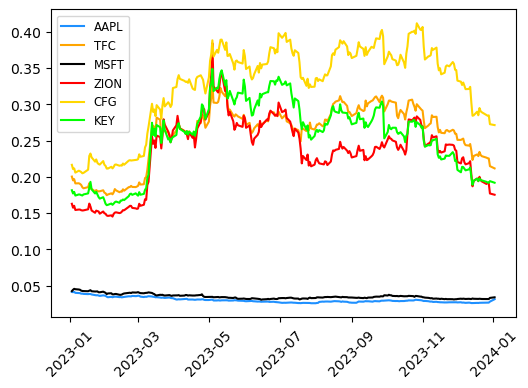

In [89]:
plt.figure(figsize=(6, 4))
colors = ['dodgerblue', 'orange', 'black', 'red',  'gold', 'lime', 'green','chocolate',  'gray', 'yellow']

for index, (name, row) in enumerate(transposed_df.iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')

plt.legend(loc='center left', bbox_to_anchor=(0, 0.79), fancybox=True, fontsize='small', ncol=1)
#plt.ylim(-0.065, 0.065)
plt.xticks(rotation=45) 
plt.show()

### Size

In [94]:
logmc=Market_cap.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logmc=logmc.fillna(0)

In [95]:
logsales=SALES.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logsales=logsales.fillna(0)

In [96]:
logta=total_asset.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logta=logta.fillna(0)

In [97]:
Size=0.28*logmc+0.36*logsales+0.36*logta

In [98]:
normal=pd.DataFrame(index= Size.index, columns=Size.columns)
for index, row in Size.iterrows():

    row_mean = np.mean(row)

    row_std = np.std(row)
    
    normalized_row = (row - row_mean) / row_std
    
    normal.loc[index] = normalized_row

In [99]:
Size=normal

In [102]:
Size=Size.astype(float)

In [103]:
#NaN ellenorzese
x=0
for column in Size.columns:
    has_nan = Size[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [104]:
#inf ellenorzese
szumma=0
for column in Size.columns:
    has_inf = np.isinf(Size[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


### Trading Activity

In [105]:
volume=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Volume", index_col=0)
shares_out=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SH OUT", index_col=0)

In [106]:
#Volume/Share outstanding
v_per_s=volume/(shares_out*1000000)
v_per_s=v_per_s.fillna(0)
v_per_s.replace([np.inf, -np.inf], 0, inplace=True)

In [107]:
start_index = v_per_s.index.get_loc('2023-01-03')
end_index = len(v_per_s)
trad_act = pd.DataFrame(index=v_per_s.index[start_index:end_index], columns=v_per_s.columns)

sum_values=0
for i in range(start_index, end_index):
    for k in range(-500, 0):
        x=np.exp(k*np.log(2)/180)*v_per_s.iloc[i+k, :]
        sum_values = sum_values+x
    trad_act.iloc[i-start_index, :] = sum_values
    sum_values=0

In [108]:
normaltrad=pd.DataFrame(index= trad_act.index, columns=trad_act.columns)
for index, row in trad_act.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normaltrad.loc[index] = normalized_row

In [109]:
trad_act=normaltrad

In [110]:
trad_act=trad_act.astype(float)

In [111]:
#NaN ellenorzese
x=0
for column in trad_act.columns:
    has_nan = trad_act[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [112]:
#inf ellenorzese
szumma=0
for column in trad_act.columns:
    has_inf = np.isinf(trad_act[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


### Growth Forecast

In [113]:
eps_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="EPS 2016", index_col=0)
eps1y_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="best eps next year", index_col=0)
sales1y_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="best sales", index_col=0)

In [114]:
eps=eps_.replace(0, method='ffill')
eps1y=eps1y_.replace(0, method='ffill')
sales1y=sales1y_.replace(0, method='ffill')

In [116]:
#eps2y extrapolalas atlaggal
start_index = eps.index.get_loc('2023-01-03')
end_index = len(eps)
eps2y = pd.DataFrame(index=eps.index[start_index:end_index], columns=eps.columns)

for column_name in eps.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = eps.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=eps1y.iloc[i][column_name]
        tarol.append(y)
        atlag = sum(tarol) / len(tarol)
        eps2y.iloc[i - start_index][column_name] = atlag

In [117]:
#sales2y extrapolalas atlaggal
start_index = SALES_ism.index.get_loc('2023-01-03')
end_index = len(SALES_ism)
sales2y = pd.DataFrame(index=SALES_ism.index[start_index:end_index], columns=SALES_ism.columns)

for column_name in SALES_ism.columns:
    for i in range(start_index, end_index):
        tarol = []
        for k in range(5, -1, -1):
            x = SALES_ism.iloc[i - k * 252][column_name]
            tarol.append(x)
        y=sales1y.iloc[i][column_name]
        tarol.append(y)
        atlag2 = sum(tarol) / len(tarol)
        sales2y.iloc[i - start_index][column_name] = atlag2

In [118]:
eps1y_2023=eps1y.iloc[1762:2013]
sales1y_2023=sales1y.iloc[1762:2013]

### Growth

In [119]:
EPS_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok kieg.xlsx", sheet_name="EPS 2016", index_col=0)
Earnings_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="is inc bef xo item 2016", index_col=0)

In [121]:
Earnings_ism = Earnings_.replace(0, method='ffill')

In [122]:
#total asset szamlalója
start_index = total_asset_ism.index.get_loc('2023-01-03')
end_index = len(total_asset_ism)
totass_szamlalo = pd.DataFrame(index=total_asset_ism.index[start_index:end_index], columns=total_asset_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = total_asset_ism.iloc[i-(k-1)*251] - total_asset_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    totass_szamlalo.iloc[i-start_index, :] = x

In [123]:
#sales szamlalója
start_index = SALES_ism.index.get_loc('2023-01-03')
end_index = len(SALES_ism)
sales_szamlalo = pd.DataFrame(index=SALES_ism.index[start_index:end_index], columns=SALES_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = SALES_ism.iloc[i-(k-1)*251] - SALES_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    sales_szamlalo.iloc[i-start_index, :] = x

In [124]:
#Earnings szamlalója
start_index = Earnings_ism.index.get_loc('2023-01-03')
end_index = len(Earnings_ism)
earnings_szamlalo = pd.DataFrame(index=Earnings_ism.index[start_index:end_index], columns=Earnings_ism.columns)

for i in range(start_index, end_index):
    lista=[]
    for k in range(1, 6):
        diff = Earnings_ism.iloc[i-(k-1)*251] - Earnings_ism.iloc[i - k * 251]
        lista.append(diff)
    x= sum(lista) / len(lista)
    earnings_szamlalo.iloc[i-start_index, :] = x

In [125]:
#total asset nevező
total_asset_nan=total_asset_.replace(0, np.nan)
start_index = total_asset_nan.index.get_loc('2023-01-03')
total_ass_nevezo = pd.DataFrame(index=total_asset_nan.index[start_index:], columns=total_asset_nan.columns)

for column in total_asset_nan.columns:
    atlag_lista = []
    for i in range(start_index, len(total_asset_nan)):
        window = total_asset_nan.loc[total_asset_nan.index[i-1260]:total_asset_nan.index[i], column]  
        atlag = window.mean()             
        atlag_lista.append(atlag)

    total_ass_nevezo [column] = atlag_lista

In [126]:
TAG=totass_szamlalo/total_ass_nevezo 
SG=sales_szamlalo/total_ass_nevezo 
EG=earnings_szamlalo/total_ass_nevezo 
EFG=eps2y/eps1y_2023
SFG=sales2y/sales1y_2023
TAG=TAG.fillna(0)
TAG.replace([np.inf, -np.inf], 0, inplace=True)
SG=SG.fillna(0)
SG.replace([np.inf, -np.inf], 0, inplace=True)
EG=EG.fillna(0)
EG.replace([np.inf, -np.inf], 0, inplace=True)
EFG=EFG.fillna(0)
EFG.replace([np.inf, -np.inf], 0, inplace=True)
SFG=SFG.fillna(0)
SFG.replace([np.inf, -np.inf], 0, inplace=True)

In [132]:
Growth=0.23*TAG+0.26*SG+0.15*EG+0.16*EFG+0.2*SFG

In [133]:
normalgr=pd.DataFrame(index= Growth.index, columns=Growth.columns)
for index, row in Growth.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalgr.loc[index] = normalized_row

In [134]:
Growth=normalgr
Growth=Growth.astype(float)

In [135]:
#NaN ellenorzese
x=0
for column in Growth.columns:
    has_nan = Growth[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [136]:
#inf ellenorzese
szumma=0
for column in Growth.columns:
    has_inf = np.isinf(Growth[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [ ]:
Growth_=Growth.iloc[-1]

In [ ]:
Growth_.plot.hist()

### Leverage

In [137]:
book_value_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="book value", index_col=0)

In [138]:
book_value_ism = book_value_.replace(0, method='ffill')
book_value= book_value_ism.iloc[1762:2013]

In [139]:
szamlalo=LT_Debt+np.maximum(ST_Debt-cash, nulla)
nevezo=book_value+LT_Debt+np.maximum(ST_Debt-cash, nulla)

BLev=szamlalo/nevezo
BLev=BLev.fillna(0)
BLev.replace([np.inf, -np.inf], 0, inplace=True)

MLev=szamlalo/EV
MLev=MLev.fillna(0)
MLev.replace([np.inf, -np.inf], 0, inplace=True)

D2TA=szamlalo/total_asset
D2TA=D2TA.fillna(0)
D2TA.replace([np.inf, -np.inf], 0, inplace=True)

In [140]:
Leverage=0.34*BLev+0.33*MLev+0.33*D2TA

In [141]:
normallev=pd.DataFrame(index= Leverage.index, columns=Leverage.columns)
for index, row in Leverage.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normallev.loc[index] = normalized_row

In [142]:
Leverage=normallev
Leverage=Leverage.astype(float)

In [143]:
#NaN ellenorzese
x=0
for column in Leverage.columns:
    has_nan = Leverage[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [144]:
#inf ellenorzese
szumma=0
for column in Leverage.columns:
    has_inf = np.isinf(Leverage[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [ ]:
Leverage_=Leverage.iloc[-1]

In [ ]:
Leverage_.plot.hist()

### Profitability

In [145]:
ROE_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROE", index_col=0 )
ROCE_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROCE", index_col=0 )
ROA_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROA", index_col=0 )
Ebitda_margin_=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="EBITDA_MARGIN", index_col=0)

In [146]:
ROE_ism=ROE_.replace(0, method='ffill')
ROCE_ism=ROCE_.replace(0, method='ffill')
ROA_ism=ROA_.replace(0, method='ffill')
Ebitda_margin_ism=Ebitda_margin_.replace(0, method='ffill')
ROE=ROE_ism.iloc[1762:2013]
ROCE=ROCE_ism.iloc[1762:2013]
ROA=ROA_ism.iloc[1762:2013]
Ebitda_margin=Ebitda_margin_ism.iloc[1762:2013]

In [147]:
Profitability=0.26*(ROE/100)+0.28*(ROCE/100)+0.28*(ROA/100)+0.18*(Ebitda_margin/100)

In [148]:
normalprof=pd.DataFrame(index= Profitability.index, columns=Profitability.columns)
for index, row in Profitability.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalprof.loc[index] = normalized_row

In [149]:
Profitability=normalprof
Profitability=Profitability.astype(float)

In [150]:
x=0
for column in Profitability.columns:
    has_nan = Profitability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [151]:
szumma=0
for column in Profitability.columns:
    has_inf = np.isinf(Profitability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [ ]:
Profitability_=Profitability.iloc[-1]

In [ ]:
Profitability_.plot.hist()

### Earnings Variability

In [152]:
start_index = Earnings_ism.index.get_loc('2023-01-03')
result_dfear = pd.DataFrame(index=Earnings_ism.index[start_index:], columns=Earnings_ism.columns)

for column in Earnings_ism.columns:
    std_devs = []
    for i in range(start_index, len(Earnings_ism)):
        window = Earnings_ism.loc[Earnings_ism.index[i-1260]:Earnings_ism.index[i], column]  
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfear[column] = std_devs  

In [153]:
start_index = cash_ism.index.get_loc('2023-01-03')
result_dfcash = pd.DataFrame(index=cash_ism.index[start_index:], columns=cash_ism.columns)

for column in cash_ism.columns:
    std_devs = []
    for i in range(start_index, len(cash_ism)):
        window = cash_ism.loc[cash_ism.index[i-1260]:cash_ism.index[i], column] 
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfcash[column] = std_devs 

In [154]:
start_index = SALES_ism.index.get_loc('2023-01-03')
result_dfsales = pd.DataFrame(index=SALES_ism.index[start_index:], columns=SALES_ism.columns)

for column in SALES_ism.columns:
    std_devs = []
    for i in range(start_index, len(SALES_ism)):
        window = SALES_ism.loc[SALES_ism.index[i-1260]:SALES_ism.index[i], column]  
        std_dev = window.std()            
        std_devs.append(std_dev)

    result_dfsales[column] = std_devs 

In [155]:
start_index = total_asset_ism.index.get_loc('2023-01-03')
median_tot_ass = pd.DataFrame(index=total_asset_ism.index[start_index:], columns=total_asset_ism.columns)

for column in total_asset_ism.columns:
    medians = []
    for i in range(start_index, len(total_asset_ism)):
        window = total_asset_ism.loc[total_asset_ism.index[i-1260]:total_asset_ism.index[i], column]
        median = window.median()            
        medians.append(median)

    median_tot_ass[column] = medians

In [156]:
EarnVol=result_dfear/median_tot_ass
CFVol=result_dfcash/median_tot_ass
SalesVol=result_dfsales/median_tot_ass

In [157]:
EarVariability=0.34*EarnVol+0.35*CFVol+0.31*SalesVol
EarVariability=EarVariability.fillna(0)
EarVariability.replace([np.inf, -np.inf], 0, inplace=True)

In [158]:
normalear=pd.DataFrame(index= EarVariability.index, columns=EarVariability.columns)
for index, row in EarVariability.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / row_std
    normalear.loc[index] = normalized_row

In [159]:
EarVariability=normalear
EarVariability=EarVariability.astype(float)

In [160]:
#NaN ellenorzese
x=0
for column in EarVariability.columns:
    has_nan = EarVariability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [161]:
#inf ellenorzese
szumma=0
for column in EarVariability.columns:
    has_inf = np.isinf(EarVariability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [ ]:
EarVariability_=EarVariability.iloc[-1]

In [ ]:
EarVariability_.plot.hist()

### Volatility

###  $$ \text{CAPM: } E(r_i) = r_f + \beta_i (E(r_M) - r_f)$$

In [162]:
px_last_2016=px_last
div_2016=dividend
sp500=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="sp500 index", index_col=0)
rf_2016=rfree

In [163]:
r_excess=hozam

In [164]:
rf2=rf.iloc[1:]

In [165]:
#rM-rf
osztas=(sp500/sp500.shift(1))-1
rm = osztas
#.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
rM=rm.drop(rm.index[0])
market=rM-rf2

In [166]:
#CAPM beta es rezidualisok volatilitasanak kiszamolasa
start_index = r_excess.index.get_loc('2023-01-03')
end_index = len(rM)

beta = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)
resid_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for date in r_excess.index[start_index:]:
    for stock in r_excess.columns:
        
        start_date_index = r_excess.index.get_loc(date) - 1260
        end_date_index = r_excess.index.get_loc(date)  
        
        X = sm.add_constant(market[stock].loc[market.index[start_date_index:end_date_index]])
        
        y = r_excess[stock].loc[r_excess.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        beta.at[date, stock] = results.params[1]
        resid_vol.at[date, stock] = np.std(results.resid)

In [ ]:
beta

In [ ]:
resid_vol

In [167]:
res_vol=resid_vol
beta_=beta

In [168]:
start_index = r_excess.index.get_loc('2023-01-03')
return_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for column in r_excess.columns:
    std_devs = []
    for i in range(start_index, len(r_excess)):
        window = r_excess.loc[r_excess.index[i-252]:r_excess.index[i], column] 
        std_dev = window.std()           
        std_devs.append(std_dev)

    return_vol[column] = std_devs 

In [169]:
px_last_2016.replace(0, np.nan, inplace=True)
start_index = px_last_2016.index.get_loc('2023-01-03')
crng = pd.DataFrame(index=px_last_2016.index[start_index:], columns=px_last_2016.columns)

for column in px_last_2016.columns:
    ratio = []
    for i in range(start_index, len(px_last_2016)):
        window = px_last_2016.loc[px_last_2016.index[i-252]:px_last_2016.index[i], column] 
        min_val = window.min()
        max_val = window.max()
        rat = max_val / min_val
        ratio.append(rat)

    crng[column] = ratio

In [170]:
crng=crng.fillna(0)

In [171]:
Volatility=0.3*return_vol+0.14*beta_+0.29*res_vol+0.26*crng

In [172]:
normalvol1=pd.DataFrame(index= Volatility.index, columns=Value.columns)
for index, row in Volatility.iterrows():
    row_mean = np.mean(row)
    row_std = np.std(row)
    normalized_row = (row - row_mean) / np.sqrt(row_std)
    normalvol1.loc[index] = normalized_row

In [173]:
Volatility=normalvol1
Volatility=Volatility.astype(float)

In [174]:
#NaN ellenorzes
x=0
for column in Volatility.columns:
    has_nan = Volatility[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [175]:
#inf ellenorzese
szumma=0
for column in Volatility.columns:
    has_inf = np.isinf(Volatility[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


## Volatilitás regressziója

In [177]:
#ez kb 12-15 percig fut
start_index = Volatility.index.get_loc('2023-01-03')
end_index = len(Volatility)
error = pd.DataFrame(index=Volatility.index[start_index:], columns=Volatility.columns)

for date in Volatility.index[start_index:]:
    for stock in Volatility.columns:
        start_date_index = Volatility.index.get_loc(date)
        end_date_index = Volatility.index.get_loc(date)+1
        
        X = sm.add_constant(pd.concat([momentum[stock].loc[momentum.index[start_date_index:end_date_index]],
                                       DivYield[stock].loc[DivYield.index[start_date_index:end_date_index]],
                                       Value[stock].loc[Value.index[start_date_index:end_date_index]],
                                       Size[stock].loc[Size.index[start_date_index:end_date_index]],
                                       trad_act[stock].loc[trad_act.index[start_date_index:end_date_index]],
                                       Growth[stock].loc[Growth.index[start_date_index:end_date_index]],
                                       Leverage[stock].loc[Leverage.index[start_date_index:end_date_index]],
                                       Profitability[stock].loc[Profitability.index[start_date_index:end_date_index]],
                                       EarVariability[stock].loc[EarVariability.index[start_date_index:end_date_index]]], axis=1))
        
        y = Volatility[stock].loc[Volatility.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        error.at[date, stock] = results.resid.values

In [178]:
normalvol=pd.DataFrame(index= error.index, columns=error.columns)
for index, row in error.iterrows():
    row_mean_ = np.mean(row)
    row_std_ = np.std(row) 
    normalized_row_ = (row - row_mean_) / row_std_
    normalvol.loc[index] = normalized_row_

In [179]:
error=normalvol

In [180]:
error=error.astype(float)

In [ ]:
error_=error.iloc[-1]

In [ ]:
error_.plot.hist()

# Keresztmetszeti regresszió

In [186]:
datafr=matrix.copy()

In [187]:
ossz= pd.DataFrame(index=Market_cap.index, columns=['Osszeg'])
osszeg = Market_cap.sum(axis=1)
ossz['Osszeg'] = osszeg

In [ ]:
uj_oszlop_nevek = [f"oszlop_{i}" for i in range(1, 503)]
for oszlop_nev in uj_oszlop_nevek:
    ossz[oszlop_nev] = ossz['Osszeg']

ossz.columns=Market_cap.columns

In [189]:
suly=Market_cap/ossz
gyok=np.sqrt(suly)
gyok=gyok.T

In [190]:
Mom=momentum.T
Div=DivYield.T
Val=Value.T
Siz=Size.T
TrA=trad_act.T
Gro=Growth.T
Lev=Leverage.T
Pro=Profitability.T
EaV=EarVariability.T
Vol=error.T
ri=effr_i.T

In [ ]:
coeff = pd.DataFrame(index=['Konstans', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
p = pd.DataFrame(index=['Konstans', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Gro[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    y = ri[stock]
    model = sm.OLS(y, X)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns)-1      #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [226]:
#WLS
coeff = pd.DataFrame(index=['Piac', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
p = pd.DataFrame(index=['Piac', 'Momentum', 'Osztalékhozam', 'Érték', 'Méret', 'Kereskedési aktivitás', 'Növekedés', 'Tőkeáttétel', 'Jövedelmezőség', 
                              'Eredmény változékonysága', 'Volatilitás','Energia','Nyersanyagok', 'Ipari termékek', 
                              'Nem alapvető fogyasztási termékek', 'Alapvető fogyasztási termékek', 'Egészségügy', 'Pénzügy', 'IT',
                              'Kommunikációs szolgáltatások', 'Közüzemek', 'Ingatlan'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Gro[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    y = ri[stock]
    
    weights = gyok[stock]
    model = sm.WLS(y, X, weights)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns)-1      #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [227]:
new_df = pd.DataFrame(index=coeff.index, columns=coeff.columns)
for index, row in coeff.iterrows():
    cumulative_sum = 0
    for col in coeff.columns:
        cumulative_sum += row[col]
        new_df.loc[index, col] = cumulative_sum

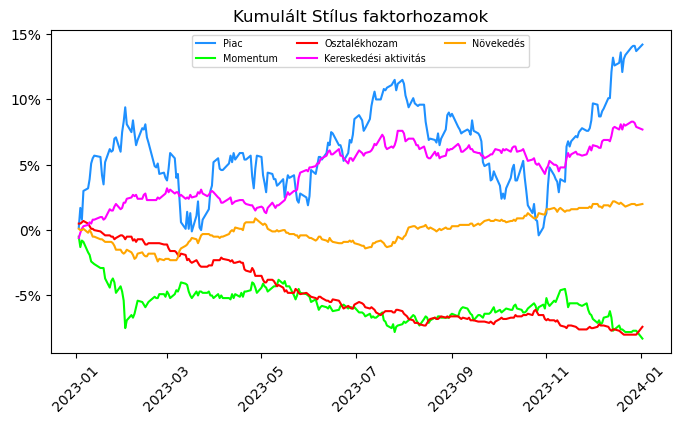

In [228]:
plt.figure(figsize=(8, 4.2))
colors = ['dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal', 'magenta', 'orange', 'silver', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen']
colors2 = [ 'magenta', 'orange', 'peru', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen','dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal']

for index, (name, row) in enumerate(new_df.iloc[0:3].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
for index, (name, row) in enumerate(new_df.iloc[5:7].iterrows()):
    plt.plot(row.index, row.values, color=colors2[index], label=f'{name}')
    
plt.title('Kumulált Stílus faktorhozamok')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, fontsize='x-small', ncol=3)
#plt.ylim(-0.8, 0.8)
plt.xticks(rotation=45) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

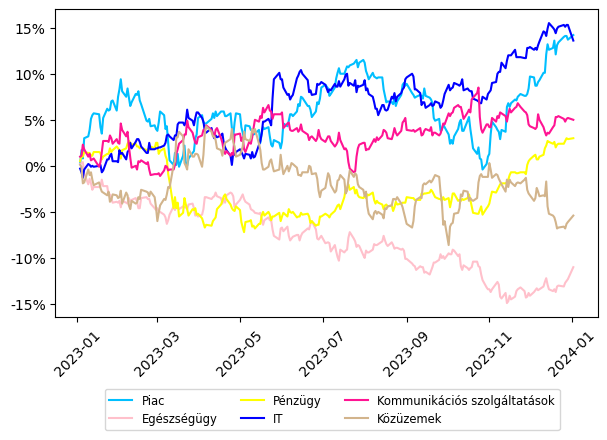

In [229]:
plt.figure(figsize=(7, 4))
colors = [ 'pink','yellow', 'blue', 'deeppink', 'tan', 'red', 'darkviolet', 'darkgreen', 'olive', 'goldenrod', 'magenta', 
           'orange', 'silver','purple',  'brown', 'pink',  'lightseagreen', 'red', 'lime',  'salmon', 'black', 'gold', 'turquoise', ]
colors2 = [ 'deepskyblue', 'lime', 'salmon', 'black', 'gold', 'turquoise', 'red', 'orange', 'peru', 'navy', 'salmon', 'indigo', 'tan', 'darkgreen','dodgerblue', 'lime',  'red', 'gold',  'chocolate', 'magenta', 'turquoise', 'brown', 'pink',  'cyan', 'red',
          'olive', 'teal']
colors3= ['darkviolet','deeppink', 'peru',  'tan',  'teal', 'darkgreen', 'lime',  'salmon', 'black', 'gold', 'turquoise','purple',  'brown', 'pink',  'lightseagreen', 'red',
           'olive', 'goldenrod', 'magenta', 'orange', 'silver',  ]

for index, (name, row) in enumerate(new_df.iloc[0:1].iterrows()):
    plt.plot(row.index, row.values, color=colors2[index], label=f'{name}')
for index, (name, row) in enumerate(new_df.iloc[16:21].iterrows()):
    plt.plot(row.index, row.values, color=colors[index], label=f'{name}')
#for index, (name, row) in enumerate(new_df.iloc[21:22].iterrows()):
  #  plt.plot(row.index, row.values, color=colors3[index], label=f'{name}')
#plt.title('Kumulált Iparág faktorhozamok')
plt.legend(loc='center left', bbox_to_anchor=(0.08, -0.30),fancybox=True, fontsize='small', ncol=3)
#plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.82), fancybox=True, shadow=True, fontsize='small', ncol=1, prop={'size': 'small'})
#plt.ylim(-0.18, 0.18)
plt.xticks(rotation=45) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

In [230]:
faktorvol = pd.DataFrame(index=coeff.index, columns=['Évesített Volatilitás'])

for index, row in coeff.iterrows():
    szoras = np.std(row)*np.sqrt(252)
    #szoras=szoras*100
    szoras_ = "{:.3f}".format(szoras)
    faktorvol.at[index, 'Évesített Volatilitás'] = szoras_

In [231]:
faktorvol=faktorvol.astype(float)

In [232]:
annualized_return= pd.DataFrame(index=coeff.index, columns=['Évesített Volatilitás'])

for index, row in coeff.iterrows():
    difference = (1+row).prod()**(252/252)-1
    annualized_return.at[index, 'Évesített Volatilitás'] = difference

In [233]:
annualized_return=annualized_return.astype(float)

In [236]:
sharpeszamlalo=annualized_return
sharpe=(sharpeszamlalo/faktorvol).round(3)
sharpe.columns=['Sharpe-ráta']

In [237]:
#az időtartam hány százalékában szignifikáns (5%-os szignifikancia szinten)
szazalek = pd.DataFrame(index=p.index[0:], columns=['%'])

for index, row in p.iterrows():
    a = 0
    for column, value in row.items():
        if value < 0.05:
            a += 1
            b=(a/251)*100
    szazalek.at[index, '%'] = b

szazalek=szazalek.astype(float)
szazalek=szazalek.round(2)
szazalek.index.name='Faktorok'

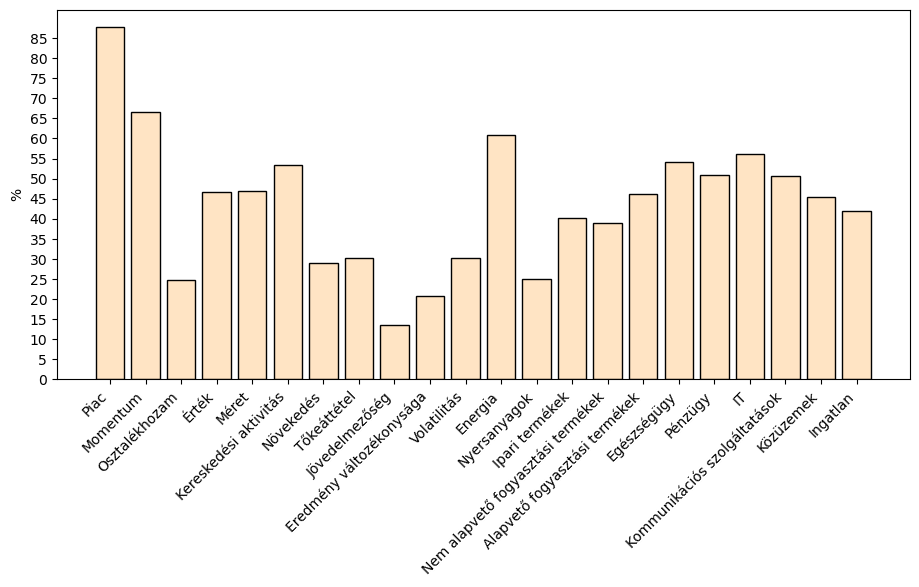

In [238]:
plt.figure(figsize=(11, 4.8))
x = range(len(szazalek.index))
plt.bar(x, szazalek['%'], color='bisque', edgecolor='Black', align='center')
#plt.title('Szignifikancia(%)')
plt.ylabel('%')
plt.xticks(x, szazalek.index, rotation=45, ha='right')
plt.yticks(range(0, 90, 5))
#plt.axhline(y=30, color='red', linestyle='--')  
plt.show()

In [240]:
R_atlag=R_adj.T.mean()

In [241]:
minimum=np.min(R_adj)
maximum=np.max(R_adj)

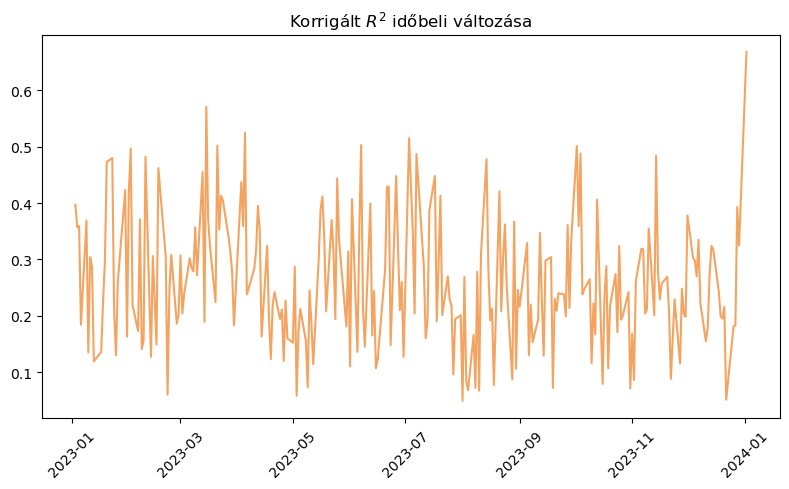

In [244]:
R_adj_=R_adj.T
plt.figure(figsize=(8, 5))
plt.title(r'Korrigált $R^2$ időbeli változása')
plt.plot(R_adj_, linestyle='-', color='SandyBrown')
plt.xticks(rotation=45)     
plt.tight_layout()  

plt.show()

In [ ]:
ax = R_adj.T.plot.hist(figsize=(8.5, 6), bins=16, alpha=0.8, color='dodgerblue', edgecolor='black' )
ax.set_ylabel('Frekvencia')
plt.show()